<h1>현업에서의 활용</h1>

    사진 출처들 < https://www.youtube.com/watch?v=kwTEvRkaHqE&t=711s > 
    대표적인 현업에서의 활용에는 제품의 품질검사가 있다.

    예시를 들면, 아래 사진 처럼 고해상도 카메라를 통해 제품을 촬영한다.
![img](./img/lap&log/고해상도카메라.png)
    
    다음과 같이 이미지 속 바코드들을 컴퓨터 비전을 통해서 검출하여 검수과정을 거칠 수 있다.

    최근에는 딥러닝의 발전으로 컴퓨터 비전과 딥러닝을 활용하여 더욱 정밀한 검출이 가능해졌다.
![img](./img/lap&log/음각.png)

    위 사진은 금속에 인쇄된 음각 문자를 컴퓨터 비전의 object detection을 활용하여 숫자들을 검출하고,
    검출한 숫자를 딥러닝을 활용해 각각의 객체가 제대로 인쇄가 된건지 확인하고 있다.

## 에지 검출 활용 사례
자동차 번호판 인식 - 에지 검출을 통해 번호판의 번호를 더욱 선명하게 인식 가능하게 한다.

<table>
<tr><th>Original</th><th>Prewitt</th></tr>
<tr>
<td><img src="./img/roberts&prewitt/car.jpg"/></td>
<td><img src="./img/roberts&prewitt/prew_car.jpg"/></td>
</tr>
</table>

In [2]:
import cv2 # openCV
import numpy as np # mask 구현
from matplotlib import pyplot as plt # 이미지 표시

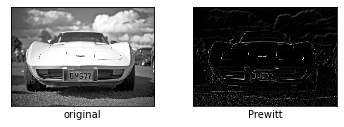

In [3]:
car = cv2.imread('./img/roberts&prewitt/car.jpg')
car = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)

car = cv2.GaussianBlur(car, (9, 9), 2) # 노이즈 제거를 위해 가우시안 블러 적용

prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_x = cv2.convertScaleAbs(cv2.filter2D(car, -1, prewitt_x))
prewitt_y = cv2.convertScaleAbs(cv2.filter2D(car, -1, prewitt_y))

prewitt_data = [car, prewitt_x + prewitt_y]

xlabels = ["original", "Prewitt"]
i = 1
fig = plt.figure()
for r in prewitt_data:
    ax = fig.add_subplot(2, 2, i)
    ax.imshow(r, cmap='gray', interpolation='none', vmin=0, vmax=255)
#     cv2.imwrite('img/output/car/' + xlabels[i - 1] + '.jpg', r)
    ax.set_xlabel(xlabels[i - 1])
    ax.set_xticks([]), ax.set_yticks([])
    i += 1